## HW2

### Setup
read in the file

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
df = pd.read_csv('data/NYC_Restaurants.csv', dtype=unicode)

Populating the interactive namespace from numpy and matplotlib


# Q1
Create a unique name for each restaurant. On the DataFrame created above, add a new column to your DataFrame, called ’RESTAURANT’, that combines DBA, BUILDING, STREET, and ZIP- CODE fields. For example, “WENDY’S 469 FLATBUSH AVENUE 11225”. Print the first 10 values of the RESTAURANT column of your DataFrame.

#### Approach
Create a copy of the dataframe and add a new column by concatinating DBA, BUILDING, STREET, & ZIPCODE.

Dropped na

Displayed first 10 rows 

In [2]:
df_copy = df.copy()
df_copy["RESTAURANT"] = df_copy['DBA'] + ' ' + df_copy['BUILDING'] + ' ' + df_copy['STREET'] + ' ' + df_copy['ZIPCODE']
df_copy.dropna()
df_copy['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Q2

How many restaurants are included in the data?
Careful now:
• A “Subway” in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don’t combine all Subways into one restaurant!
• The data can have multiple violations for the same restaurant!



### Approach: 
Created series for restaurants with the value counts

printed number of restaurants in the data

In [3]:
series_Restaurant = df_copy["RESTAURANT"].value_counts()
print "Number of restaurants included in the data: ", len(series_Restaurant)

Number of restaurants included in the data:  10114


# Q3
How many chains are there? Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode) addresses.

#### Approach
Droped duplicates

Created a new series for restaurants using DBA value counts

Created a series for chains that include all restaurants with 2 or more locations

printed number of chains in data

In [4]:
no_duplicate_Restaurant = df_copy.drop_duplicates(subset = "RESTAURANT")
Restaurant_series = no_duplicate_Restaurant["DBA"].value_counts()
#Restaurant_series
Chain_series = Restaurant_series[Restaurant_series>=2]
#Chain_series
print "Number of chains included in the data: ", len(Chain_series)

Number of chains included in the data:  368


# Q4
Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem.

#### Approach
took top 20 chains and ploted the results

The top 20 most popular chains:
Axes(0.125,0.125;0.775x0.775)


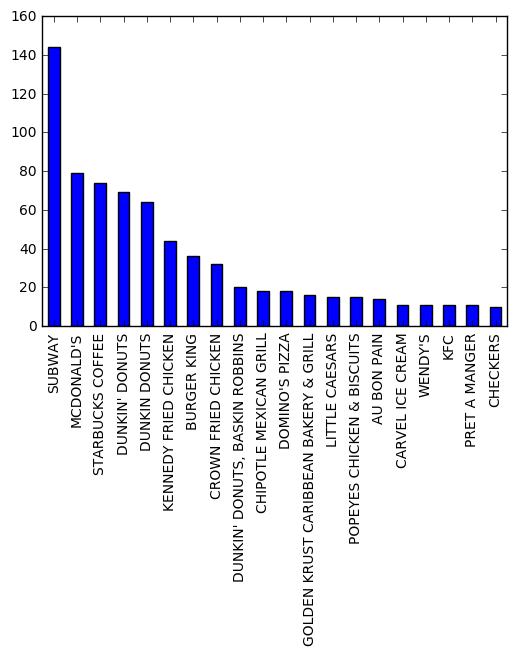

In [5]:
top_20 = Chain_series[:20]
#top_20
print "The top 20 most popular chains:"
print top_20.plot(kind='bar')

# Q5
What fraction of all restaurants are chains?

#### Approach
found number of all restaurants

created series to find all non chains, found sum

found fraction by dividing the sum of non chains by the number of all restaurants and then subtracting from 1

print the fraction 

In [6]:
num_all_restaurant = len(series_Restaurant)


Not_Chain_series = Restaurant_series[Restaurant_series<2]
Not_Chain_series.sum()
fraction = 1 - float(Not_Chain_series.sum()) / float(num_all_restaurant)


print round(fraction,4),"(or",round(fraction*100, 2),"percentage) of all restaurants are chains."

0.1647 (or 16.47 percentage) of all restaurants are chains.


# Q6
Plot the number of non-chain restaurants in each boro. First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at the plot; we don’t want to see... oh... the “missing” boro.

#### Approach

create a mask for non chains

create a copy of the non duplicate restaurants and set the index to be DBA 

create series of the chains and boros

convert series of chains and boros to a dataframe

create mask of missing boros and remove them

plot the number of non chain restaurants in each boro

Plot the number of non-chain restaurants in each boro: 
Axes(0.125,0.125;0.775x0.775)


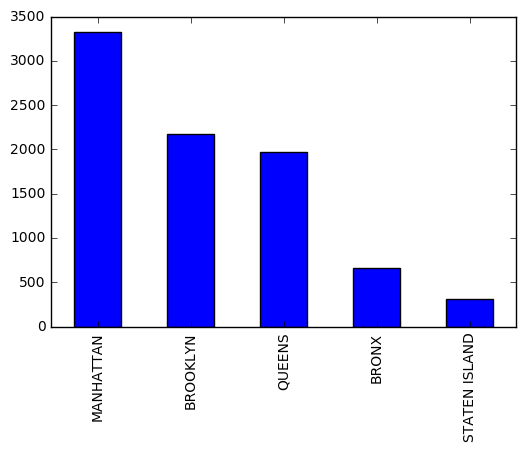

In [7]:
Not_Chain_mask = (Restaurant_series == 1)

no_duplicate_Restaurant_copy = df_copy.drop_duplicates(subset = "RESTAURANT")
no_duplicate_Restaurant_copy.set_index("DBA",inplace=True)

Not_Chain_Boro = no_duplicate_Restaurant_copy.ix[Not_Chain_mask,"BORO"]
df_boro = DataFrame(Not_Chain_Boro)

#get rid of the missing-BORO
mask = (df_boro['BORO'] == 'Missing')
df_boro.ix[mask, 'BORO'] = np.nan 

print "Plot the number of non-chain restaurants in each boro: "
print df_boro["BORO"].value_counts().plot(kind='bar')



# Q7
Plot the fraction of non-chain restaurants in each boro. The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most “independent” restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.
Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

#### Approach
create mask for "Missing" boro's and remove them

create series of the value counts for each boro of non chains

create series of value counts for total restaurants in each boro

find ratio of non chain and total restaurants for each boro

plot ratio's 

Plot the fraction of non-chain restaurants in each boro:
Axes(0.125,0.125;0.775x0.775)


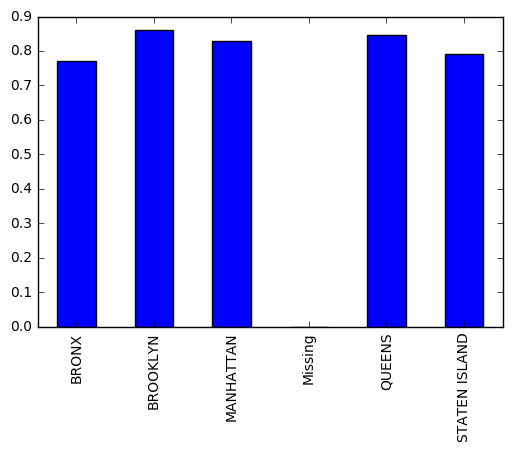

In [8]:
mask = (df_copy['BORO'] == 'Missing')
df_copy.ix[mask, 'BORO'] = np.nan 
non_chain_boro_series = df_boro["BORO"].value_counts()

total_boro_series = no_duplicate_Restaurant["BORO"].value_counts()

non_chain_boro_percentage = non_chain_boro_series/total_boro_series

print "Plot the fraction of non-chain restaurants in each boro:"
print non_chain_boro_percentage.plot(kind='bar')

### Q7 part 2
Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?
-No, Brooklyn has the highest ratio but Manhattan has the most independent restaurants. 

# Q8
Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? Plot the popularity of the top 20 cuisines. Again, be careful in your counting: remember that the same restaurant can have multiple violations!

#### Approach
create dataframe for restaruants and cuisine's, and drop duplicates

create a series using new dataframe to find value count's for each cuisine

plot the top 20 cuisines 

Plot the popularity of the top 20 cuisines: 
Axes(0.125,0.125;0.775x0.775)


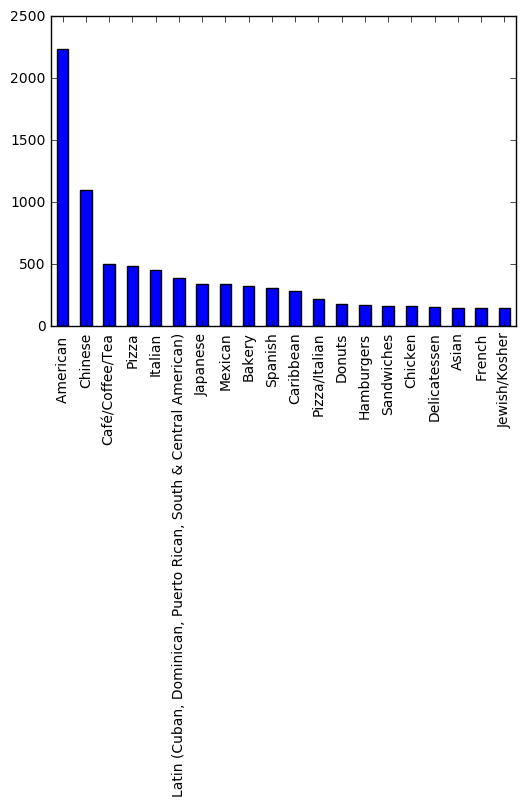

In [9]:
cusine_df = df_copy[["RESTAURANT","CUISINE DESCRIPTION"]].drop_duplicates()

cusine_series = cusine_df["CUISINE DESCRIPTION"].value_counts()

print "Plot the popularity of the top 20 cuisines: "
print cusine_series[:20].plot(kind = "bar")

# Q9
Plot the cuisines among restaurants which do not get cited for violations. Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the ’VIOLATION CODE’ field is missing.
• Select only the ’RESTAURANT’ and ’CUISINE DESCRIPTION’ columns of the DataFrame (we created the ’RESTAURANT’ field in an earlier question).
• Select the instances where a restaurant did not get cited.
• Among these instances, how frequent is each of the cuisines?
Plot the frequencies of the top-20 among these cuisines.

#### Approach
create mask to find where violation code is null

create dataframe of restaurants and cusines using the mask, drop duplicates

create sereies to count the values of cuisines

plot the top 20 cuisines that did not get a violation

Plot the top-20 cuisines among restaurants which do not get cited for violations.
Axes(0.125,0.125;0.775x0.775)


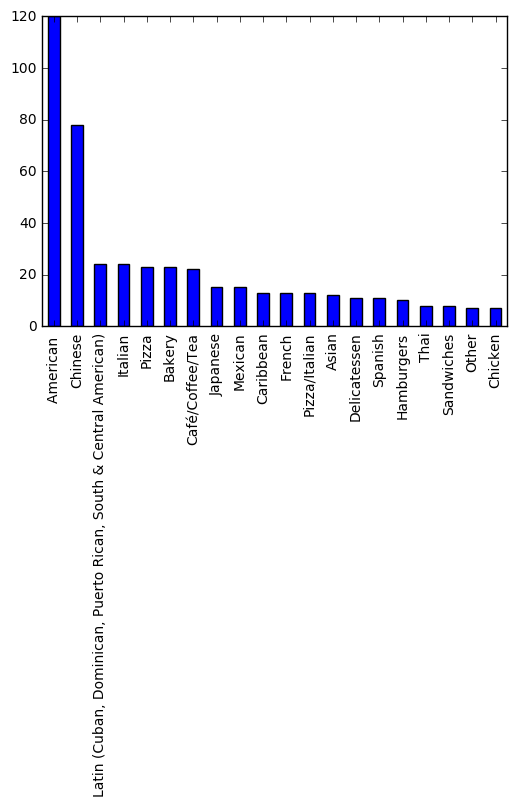

In [10]:
mask = df_copy["VIOLATION CODE"].isnull()
No_Violation_df = df_copy[mask][["RESTAURANT","CUISINE DESCRIPTION"]].drop_duplicates()
No_Violation_series = No_Violation_df["CUISINE DESCRIPTION"].value_counts()

print "Plot the top-20 cuisines among restaurants which do not get cited for violations."
print No_Violation_series[:20].plot(kind="bar")

# Q10
What cuisines tend to be the “cleanest”?
• Select all cuisines for which there were at least 20 inspections of restaurants representing that cuisine.
• For each such cuisine, compute the ratio of inspections that found no violations to the total number of inspections. (This is just the ratio of counts in the previous two questions.)
• Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are “most likely to be clean.” (Hint: Check out the “sort values” method for Series).

#### Approach
create mask to find where cuisines had at least 20 inspections

create sereis using mask

create ratio series by dividing the cuisines that didn't have violations by the cuisines that had at least 20 inspections

remove the nan values

plot the top 10 using sort values

Axes(0.125,0.125;0.775x0.775)


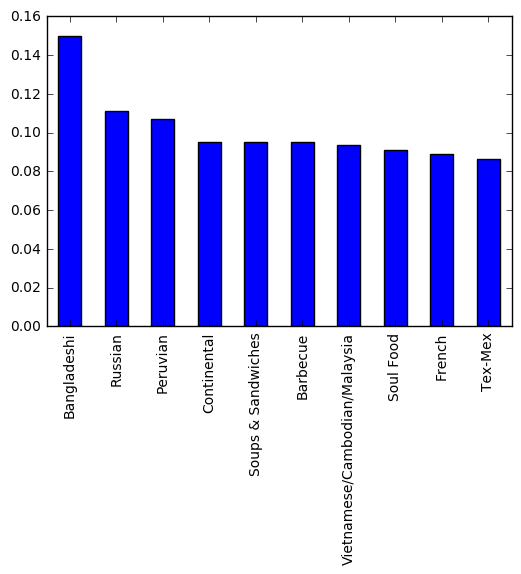

In [11]:
#cusine_df2 = df_copy[["RESTAURANT","CUISINE DESCRIPTION","INSPECTION DATE"]].drop_duplicates()
#mask = cusine_df2["CUISINE DESCRIPTION"].value_counts() >= 20
#at_least_20_inspect_series = cusine_df2["CUISINE DESCRIPTION"].value_counts() [mask]

cusine_series = cusine_df["CUISINE DESCRIPTION"].value_counts()
mask1 = cusine_series >= 20
at_least_20_inspect_series = cusine_series[mask1]

ratio_series = No_Violation_series / at_least_20_inspect_series

#get rid of the null value
mask2= ratio_series.notnull()
ratio_series2 = ratio_series[mask2]


print ratio_series2.sort_values(ascending=False)[:10].plot(kind = "bar")

# Q11
What are the most common violations in each borough? Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough.
To create the table, there are two possibilities:
• You can create a dummy column, fill it with just the number 1, and
create the table using a command we have seen in class (Hint: we will
want aggfunc=sum).
• Alternatively, you can look up the function crosstab which does this counting by default.
Once you do have the table, you will still need to find the most common violation description for each borough.

#### Approach

create dummy list and fill with "1"

create mask to remove "Missing"

create pivot table using "Violation Description" for the index, "Boro" for the column, and "Amouont of violation" for the values
use, aggfunc=sum

print each boro and it's most common violation description 

In [12]:
onelist = [1]*(len(df_copy.index))
newdf = df.copy()
newdf["Amount of Violations"] = onelist
mask = (newdf['BORO'] == 'Missing')
newdf.ix[mask, 'BORO'] = np.nan 

pivoted = pd.pivot_table(newdf,
                         index='VIOLATION DESCRIPTION',
                         columns='BORO',
                         values='Amount of Violations',
                         aggfunc=sum,
                         fill_value=0)

pivoted

print pivoted.idxmax() 


BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


# Q12
What are the most common violations per borough, after normalizing for the relative abundance of each violation? Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts, as follows.
• Get overall frequencies: Figure out how common each violation is, over the entire dataset; let’s call this violationFrequency.
• Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by violationFrequency. We want to do this for each borough.
• Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

#### Approach

find the frequency of each violation description using value counts

create a list of boro's to loop through

create a copy of the table used in Q11

loop through the list of boro's and divid each boro's number of violations by the violation frequency 

print the most common violation description for each boro

In [13]:
violationFrequency = df["VIOLATION DESCRIPTION"].value_counts()

boro_list = list(df["BORO"].value_counts().index)[:-1]
pivoted2 = pivoted.copy()
for item in boro_list:
    pivoted2[item] = pivoted2[item]/violationFrequency
pivoted2

pivoted2.idxmax() 

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object